# 1_Initialization

In [1]:
from safedigital import mechanical as ME  # import mechanical module
from datetime import datetime
from datetime import timedelta
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' + 
                  '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '0_Data original')
dir_noreclosing_washed = (cur_directory + '\\' + 
                  '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '3_Data no reclosing' + '\\' + 'washed')
dir_noreclosing_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '3_Data no reclosing' + '\\' + 'raw')


# 2_Data washing
## 2.1_Data re-orgnization
### 2.1.1_All files 
Save every curve into one .csv file

In [6]:
# for all data, split and save each curve into one single .csv file
travel_path_list = []
wave_class_dict = {'角度(合闸).txt':'travel_close', '角度(分闸).txt':'travel_open', 
                   '合闸电流(合闸).txt':'current_close', '分闸电流(分闸).txt':'current_open', 
                   '储能电流(储能).txt':'current_motor'}
for cur_dir, dirs, files in os.walk(dir_data_raw):
    print(cur_dir)
    for wave_class in wave_class_dict.keys():
        if wave_class in files:            
            wave_path = os.path.join(cur_dir, wave_class)
            # print(travel_path)
            travel_path_list.append(wave_path)
            with open(wave_path, "r", encoding='utf-8') as f: 
                data = f.read()
            wave_list = data.split("WaveID:")
            # since the 1st element is blank, wave data splitting from 2nd element
            for wave_str in wave_list[1:]:
                # extract timestamp to be name of waveform file
                time_stamp_start_idx = wave_str.find('Waveform time:') + len('Waveform time:')
                time_stamp_end_idx = wave_str.find(';Sampling frequency(ms)')
                time_stamp_str = wave_str[time_stamp_start_idx : time_stamp_end_idx]
                
                # change format of time stamp into 'XX_XX_XX'
                time_stamp_num = time_stamp_str.replace(' ', '_')
                time_stamp_num = time_stamp_num.replace(':', '_')
                time_stamp_num = time_stamp_num.replace('-', '_')
                
                # extract waveform data
                wave_data_start_idx = wave_str.find('Waveform data:') + len('Waveform data:')
                wave_data_str = wave_str[wave_data_start_idx:]
                wave_data_df = pd.DataFrame({'data':wave_data_str.split(',')})
                
                # export data into .csv file
                wave_file_name = time_stamp_num + '_' + wave_class_dict[wave_class]
                wave_data_df.to_csv(dir_data_washed + '\\' + wave_file_name + '.csv')
                    
                    
            else:
                pass
    else:
        pass
print(travel_path_list)


C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-14-43   500 NV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-500--712 HV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-9-48 N
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221123-1000--1287 LV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\2022

### 2.1.2_Files without reclosing

In [7]:
ME.DataClean.mconfig_to_csv(dir_noreclosing_raw, dir_noreclosing_washed)

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221122-14-43   500 NV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221122-500--712 HV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221122-9-48 N
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221123-1000--1287 LV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V

## 2.2_Data preview
### 2.2.1_Travel open
#### total plot

number of open trave curves: 8718


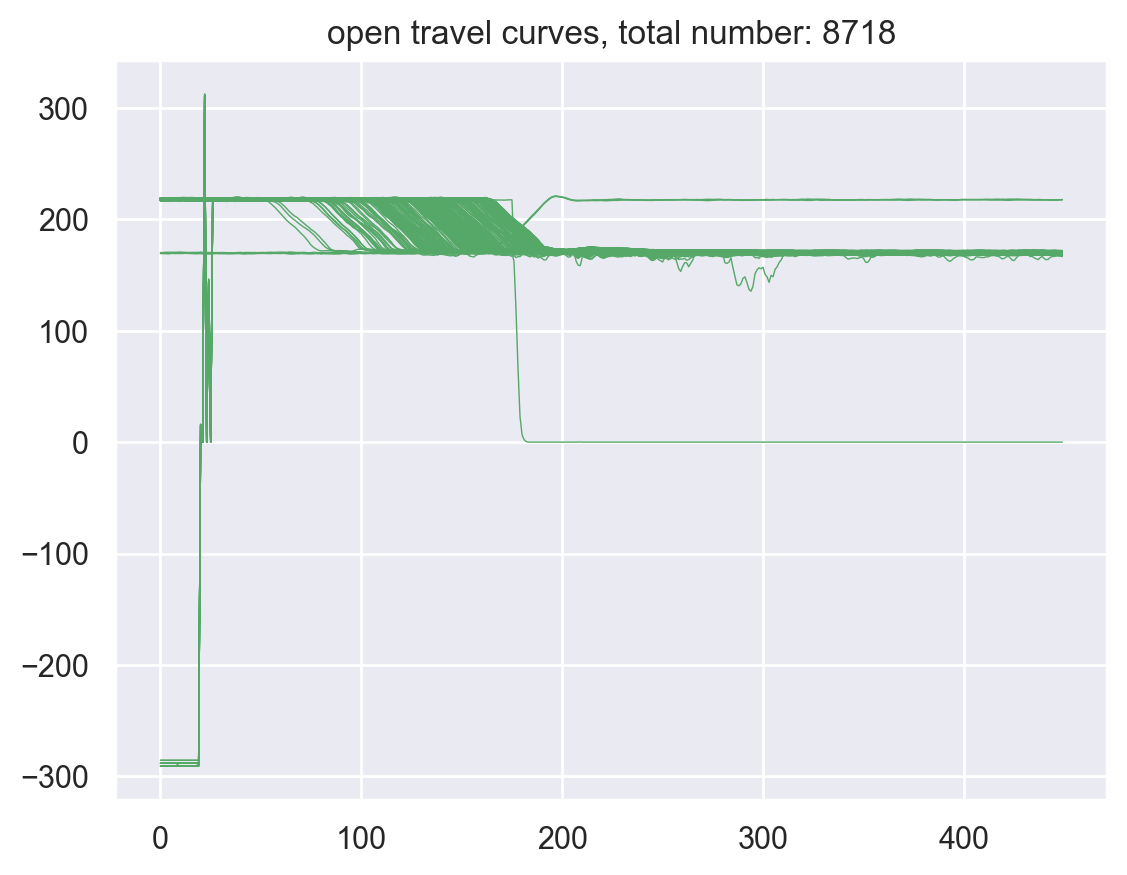

In [8]:
count_travel_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_open' in file:
            count_travel_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('open travel curves, total number: {}'.format(count_travel_open))
print('number of open trave curves:', count_travel_open)
         

#### plot every 2k

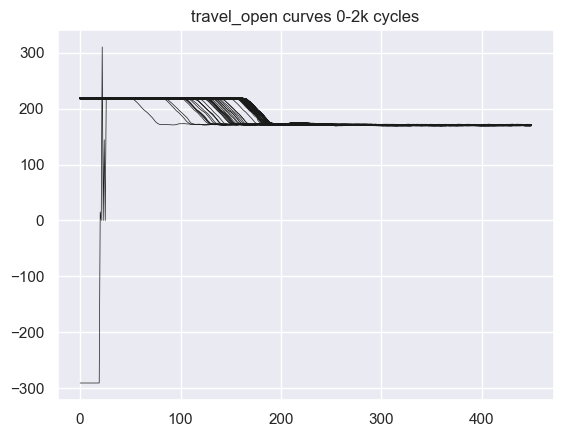

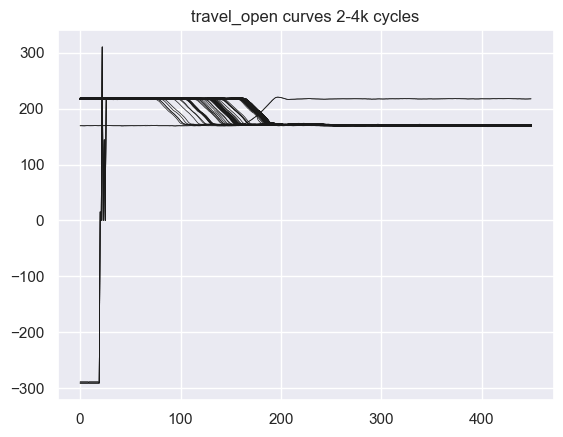

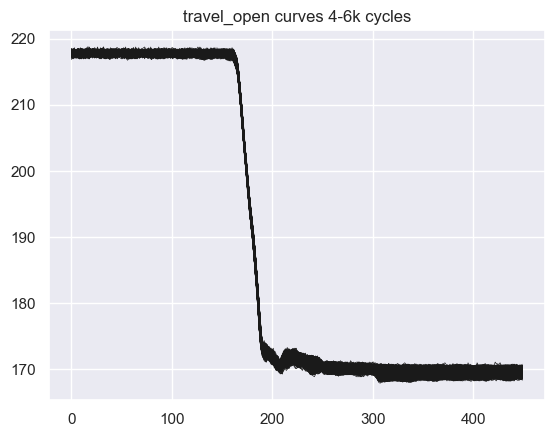

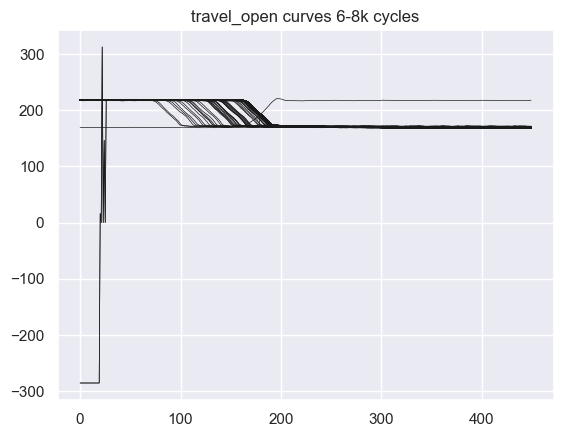

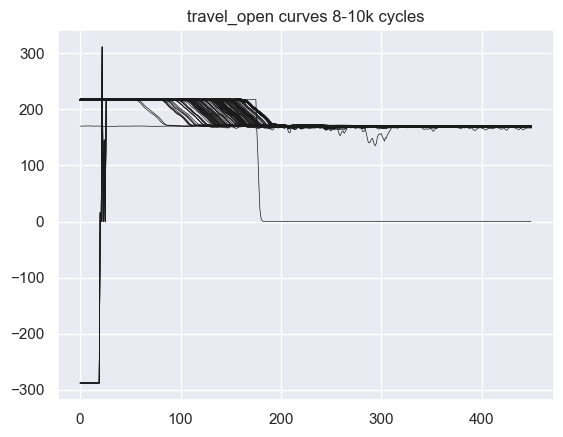

In [9]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'travel_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.2_Travel close
#### total plot

number of close trave curves: 9361


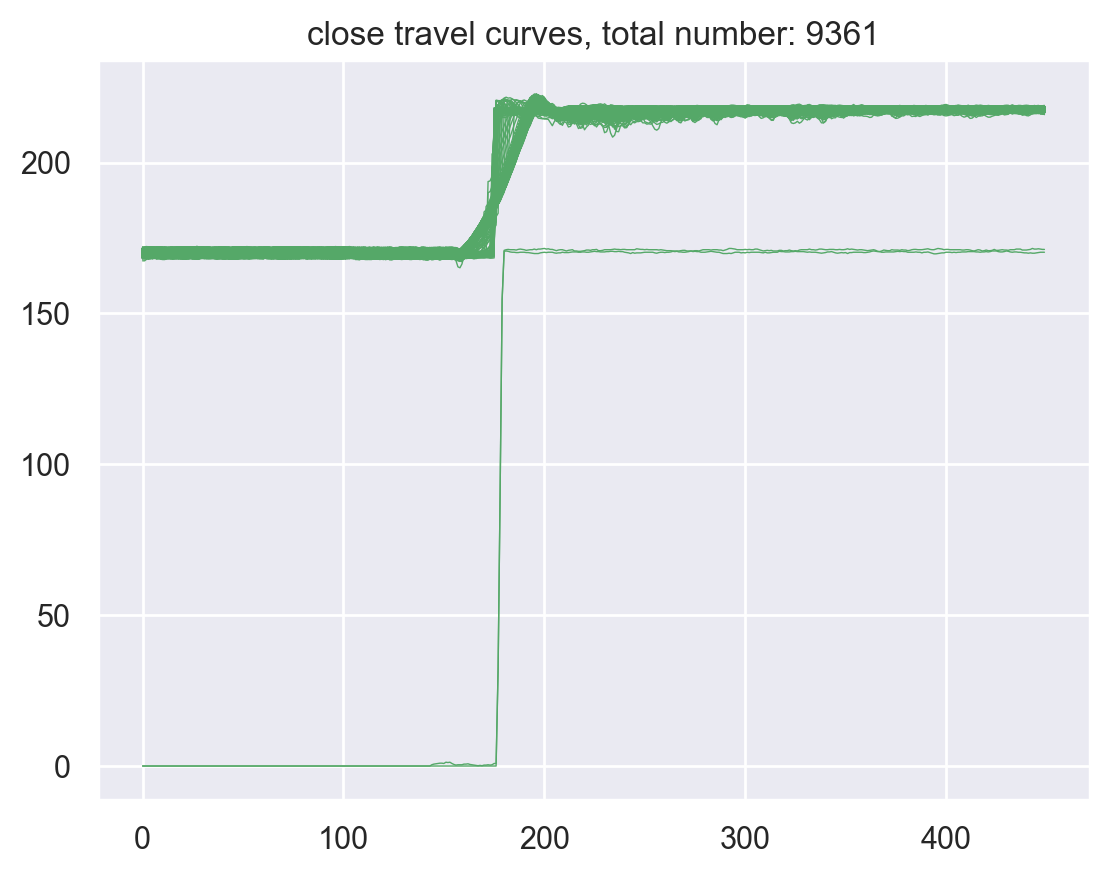

In [10]:
count_travel_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_close' in file:
            count_travel_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('close travel curves, total number: {}'.format(count_travel_close))
print('number of close trave curves:', count_travel_close) 

#### plot every 2K

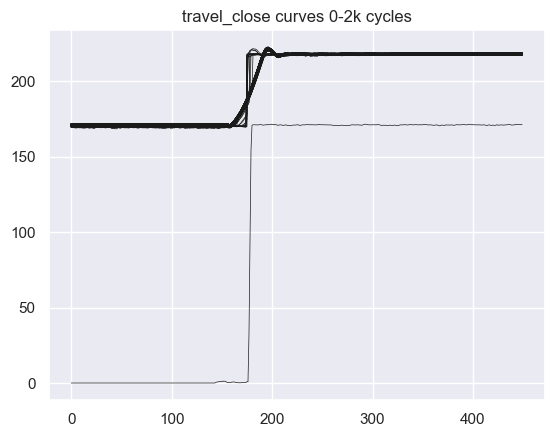

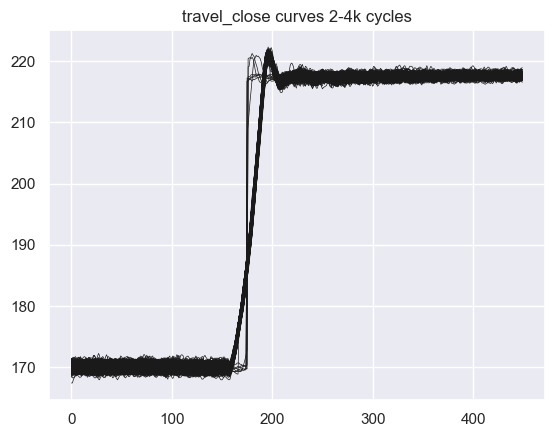

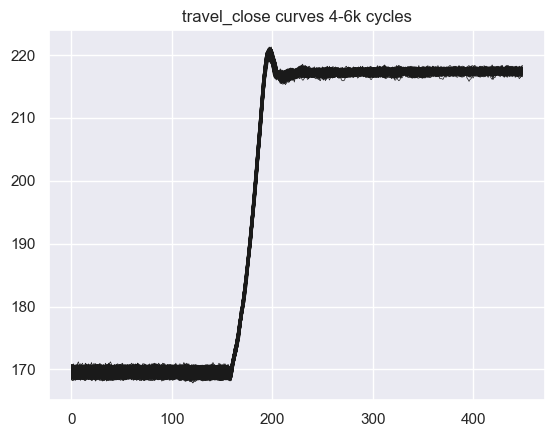

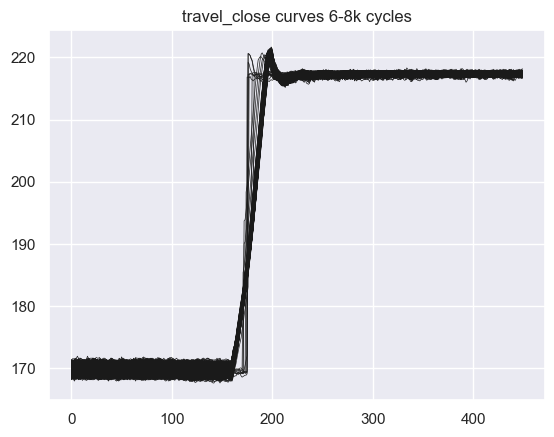

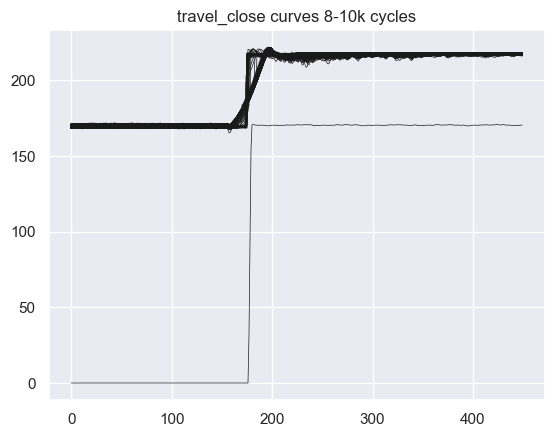

In [11]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'travel_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                 
                                )  

### 2.2.3_Current_open
#### total plot

invalid curve file name: 2022_11_24_11_47_9_257_current_open.csv
invalid curve file name: 2022_11_24_11_52_7_630_current_open.csv
invalid curve file name: 2022_11_24_12_23_54_564_current_open.csv
invalid curve file name: 2022_11_24_12_6_1_599_current_open.csv
invalid curve file name: 2022_11_24_12_8_0_233_current_open.csv
invalid curve file name: 2022_11_24_13_14_34_73_current_open.csv
invalid curve file name: 2022_11_24_13_17_32_942_current_open.csv
invalid curve file name: 2022_11_24_13_3_38_958_current_open.csv
invalid curve file name: 2022_11_24_13_7_36_63_current_open.csv
invalid curve file name: 2022_11_24_14_13_11_558_current_open.csv
invalid curve file name: 2022_11_24_14_38_1_648_current_open.csv
invalid curve file name: 2022_11_24_14_55_54_815_current_open.csv
invalid curve file name: 2022_11_28_10_0_50_998_current_open.csv
invalid curve file name: 2022_11_28_10_27_49_473_current_open.csv
invalid curve file name: 2022_11_28_10_35_16_285_current_open.csv
invalid curve file nam

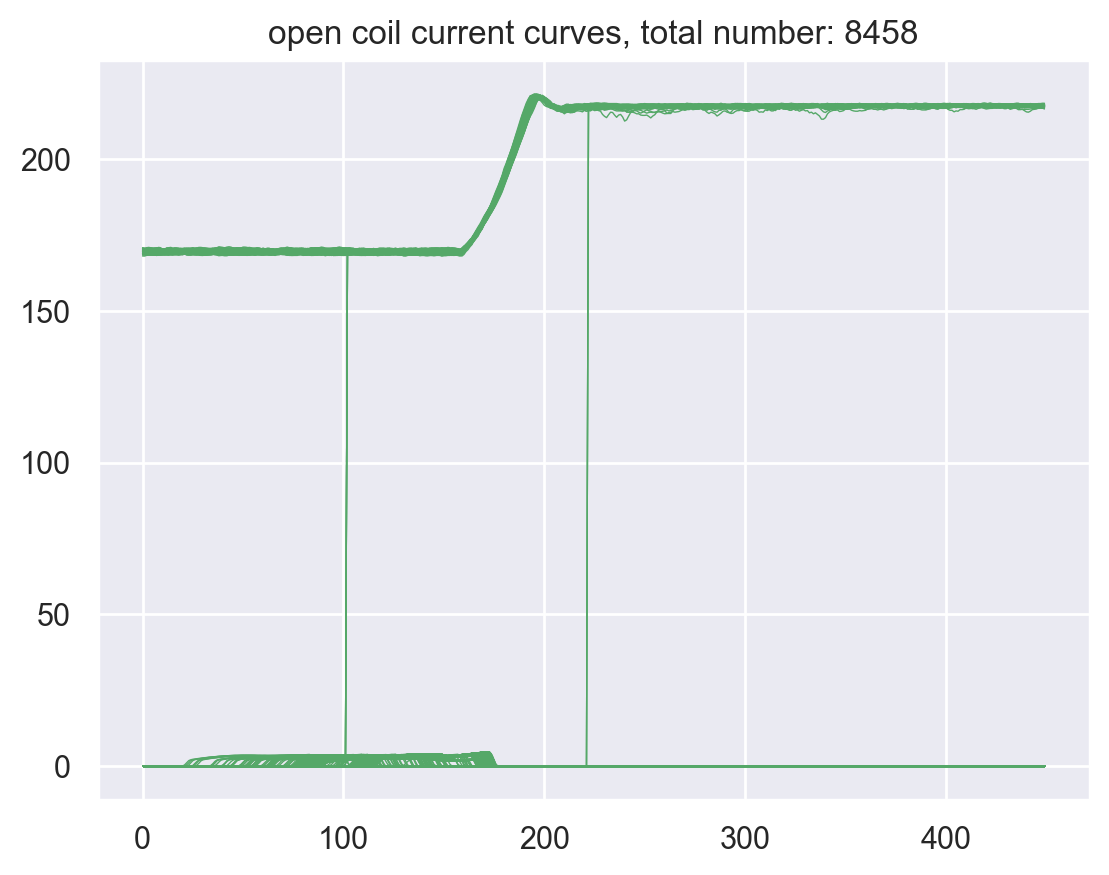

In [12]:
count_current_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_open' in file:
            count_current_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            if np.mean(curve_df['data']) >= 50:
                print('invalid curve file name:', file)
plt.title('open coil current curves, total number: {}'.format(count_current_open))
print('number of open coil current curves:', count_current_open)           

#### plot every 2k

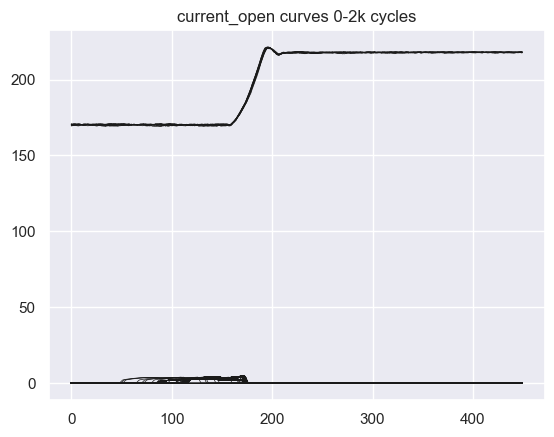

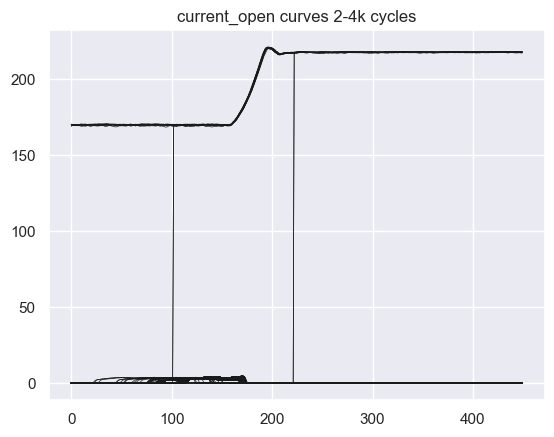

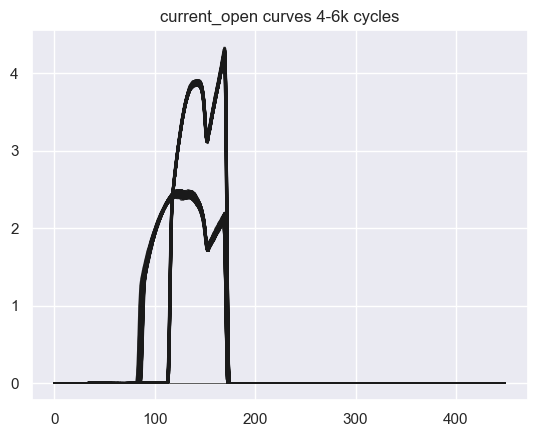

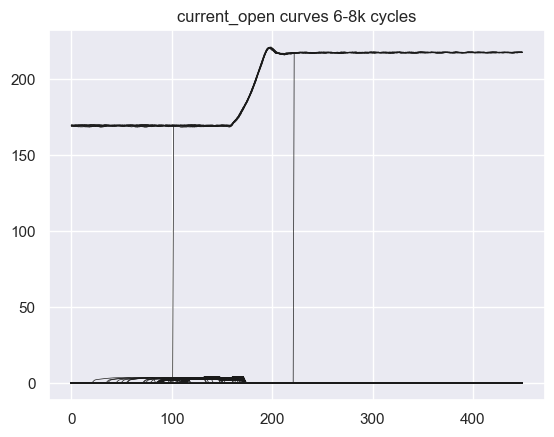

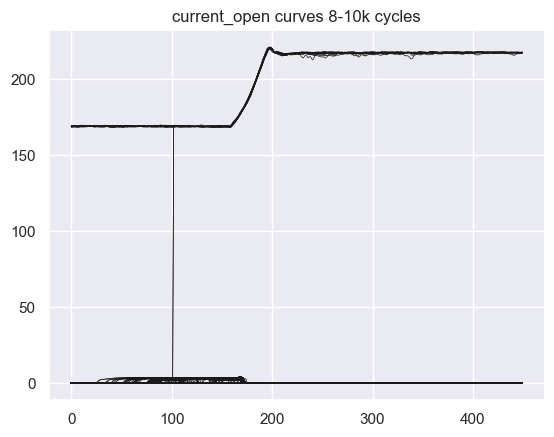

In [13]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'current_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

#### invalid curve plot

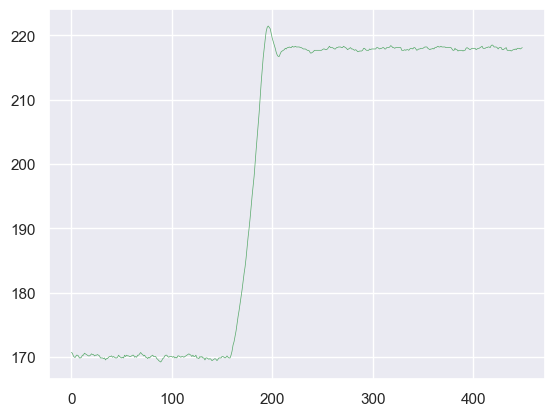

In [14]:
file = '2022_11_24_11_47_9_257_current_open.csv'
curve_df_test = pd.read_csv(os.path.join(cur_dir, file), header=0)
plt.plot(curve_df_test['data'],
         c='g',
         linewidth=0.5)

### 2.2.4_Current_close
#### total plot

number of close coil current curves: 9308


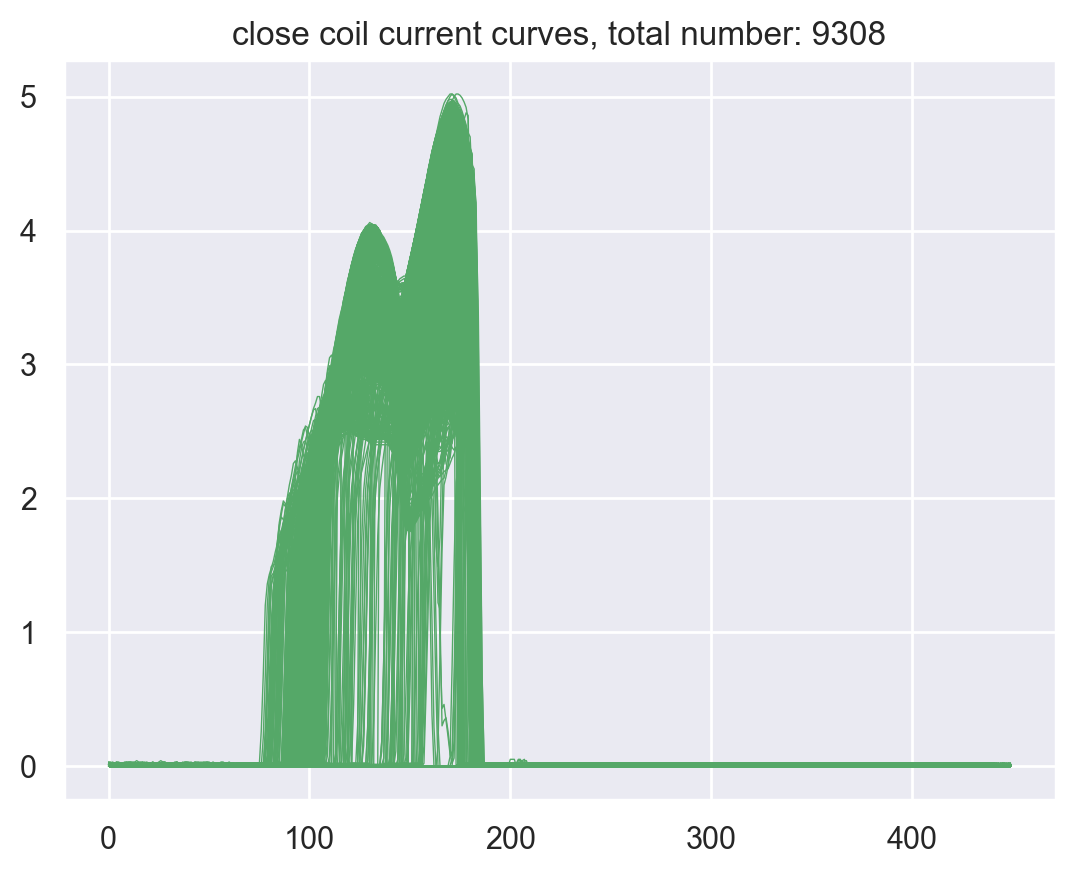

In [15]:
count_current_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot close coil current curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_close' in file:
            count_current_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            # if np.mean(curve_df['data']) >= 50:
            #     print('invalid curve file name:', file)
plt.title('close coil current curves, total number: {}'.format(count_current_close))
print('number of close coil current curves:', count_current_close)           

#### plot every 2k

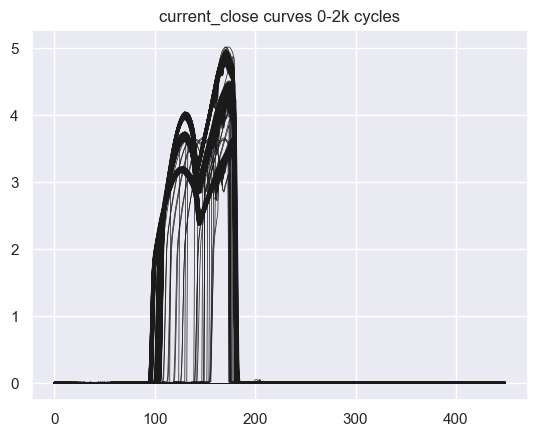

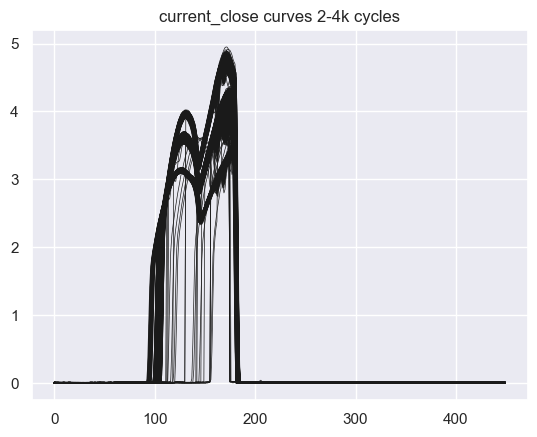

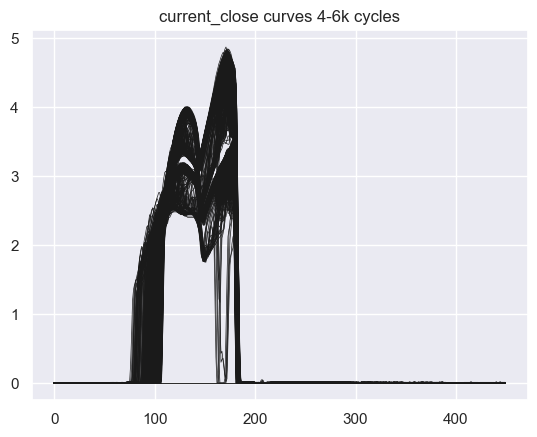

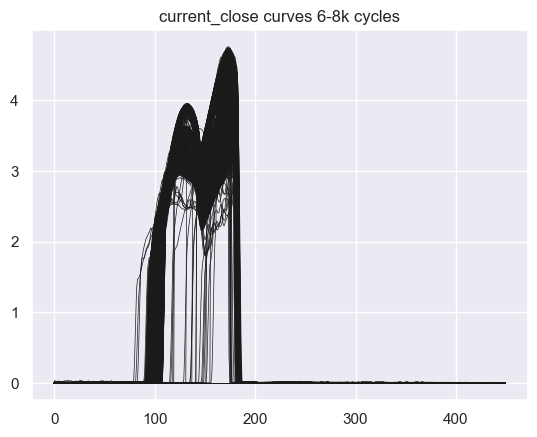

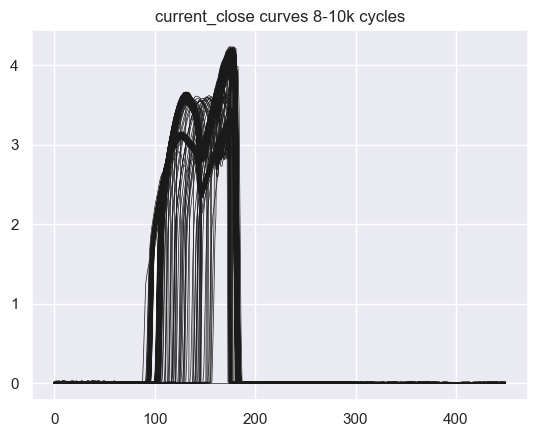

In [16]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'current_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.5_Travel open without reclosing

number of travel_open curves: 3734


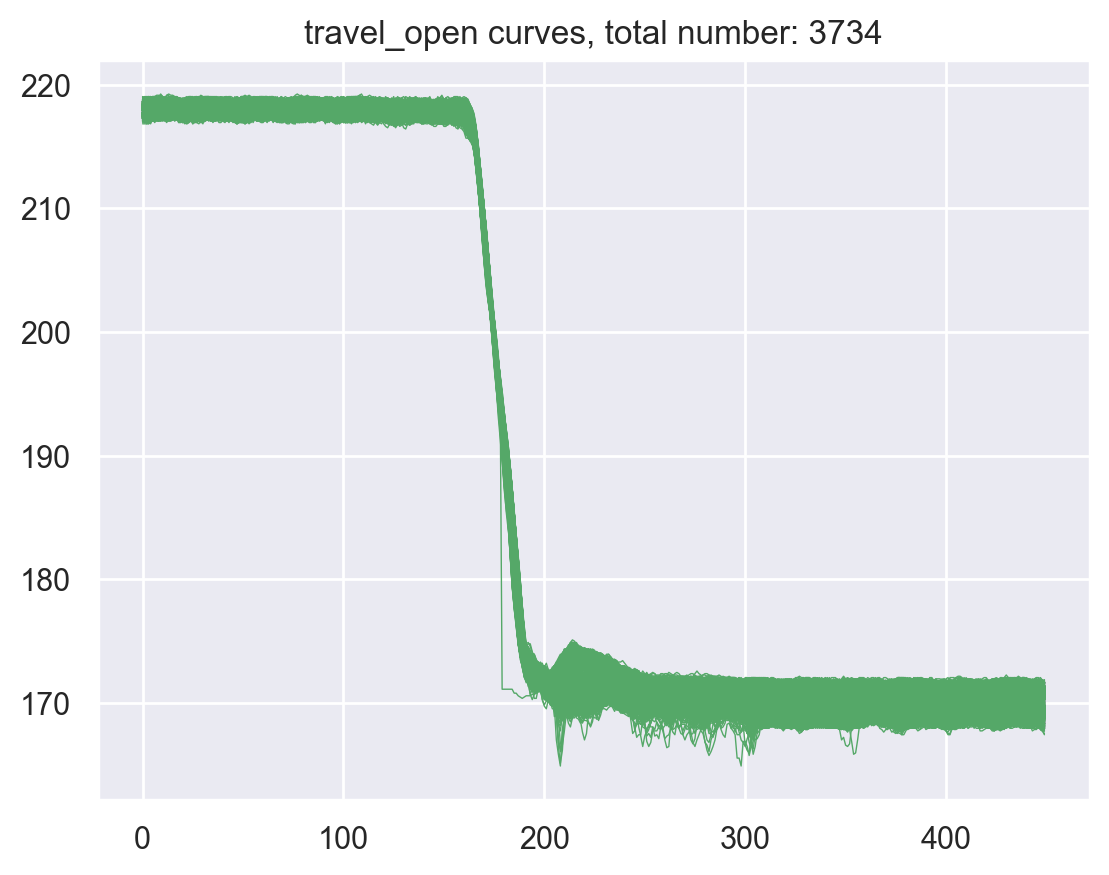

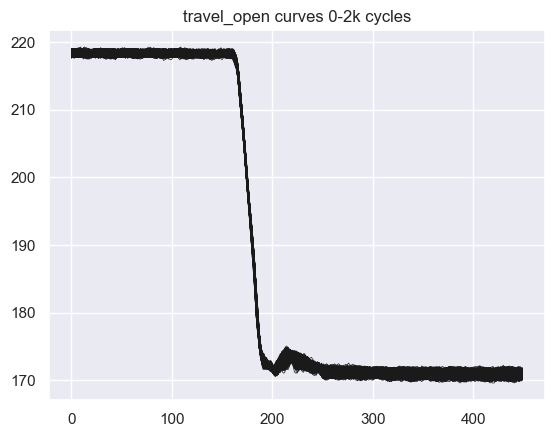

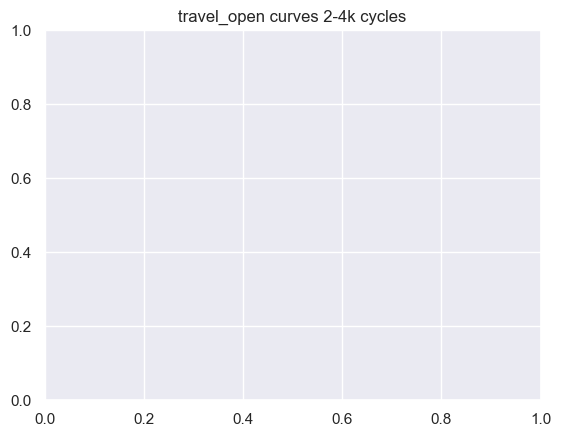

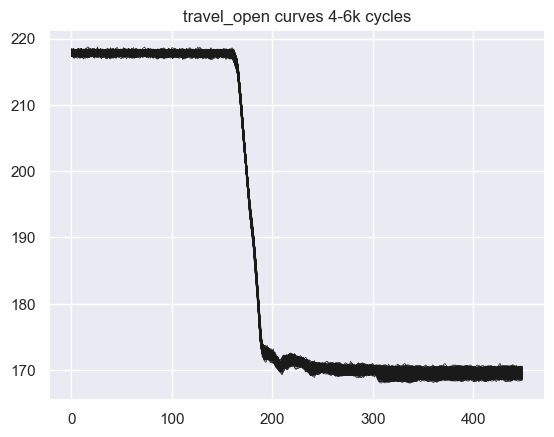

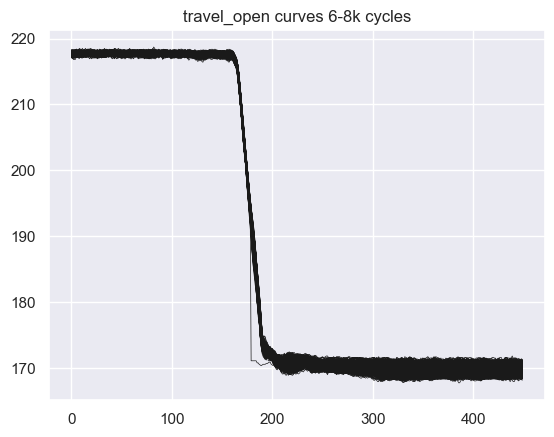

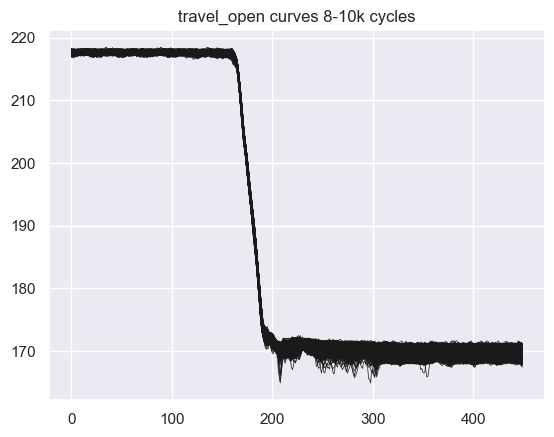

In [17]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'travel_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.6_Travel close without reclosing

number of travel_close curves: 3733


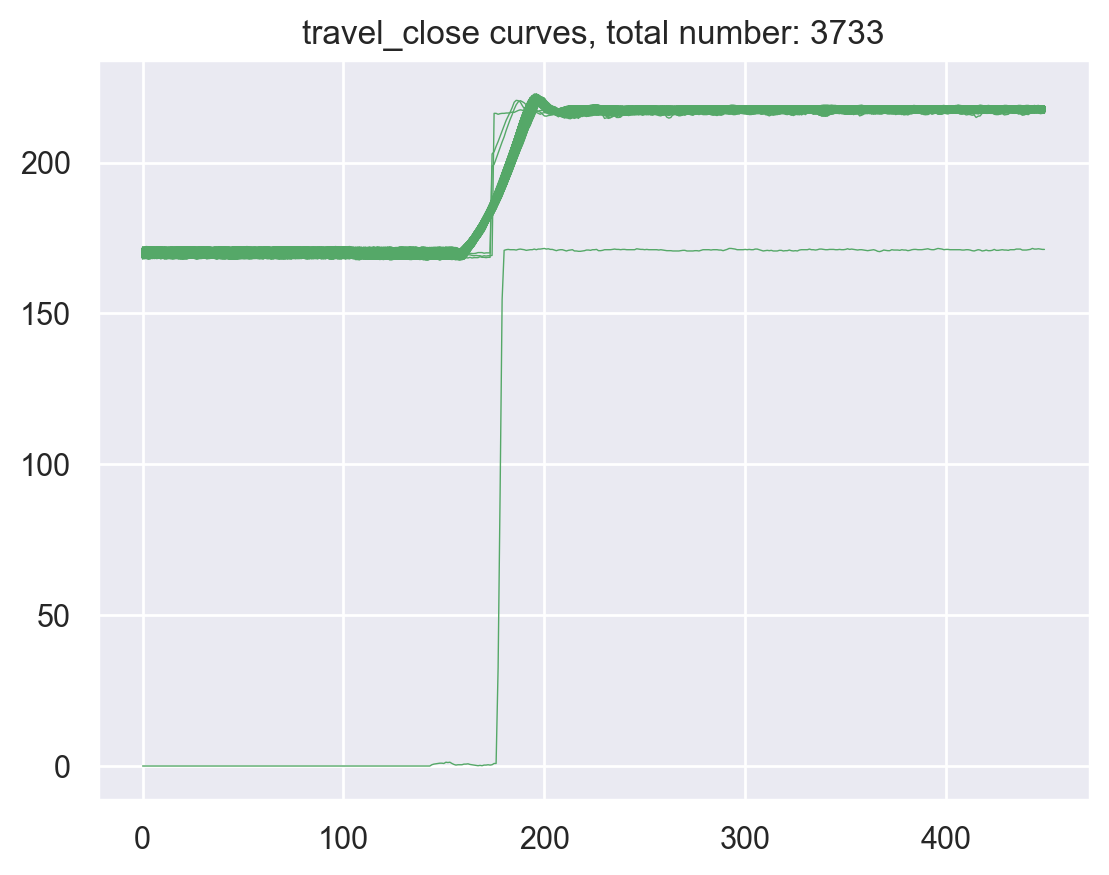

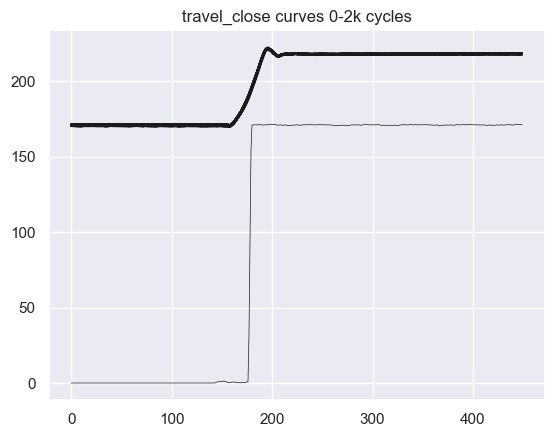

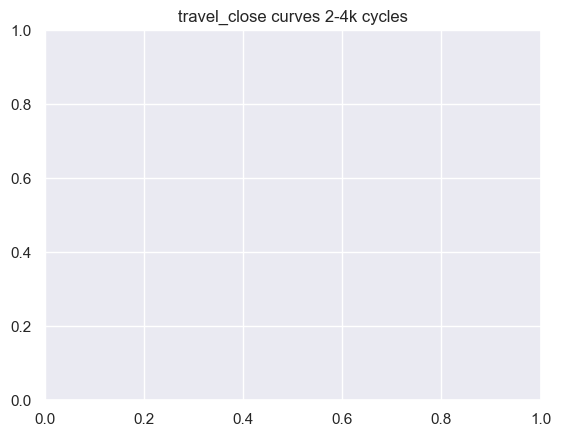

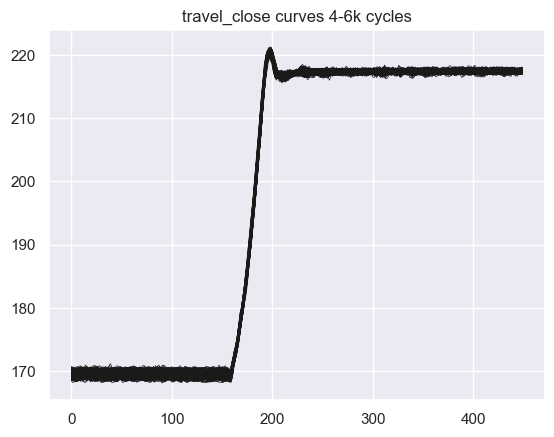

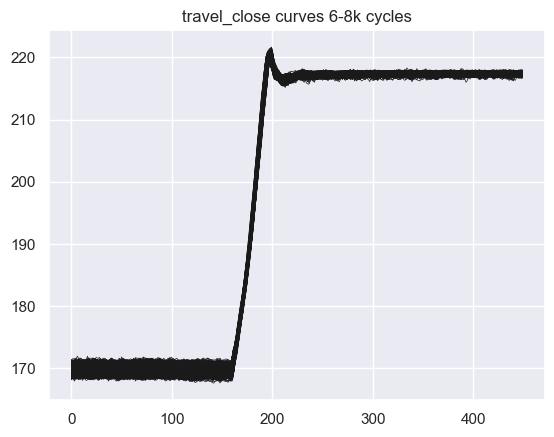

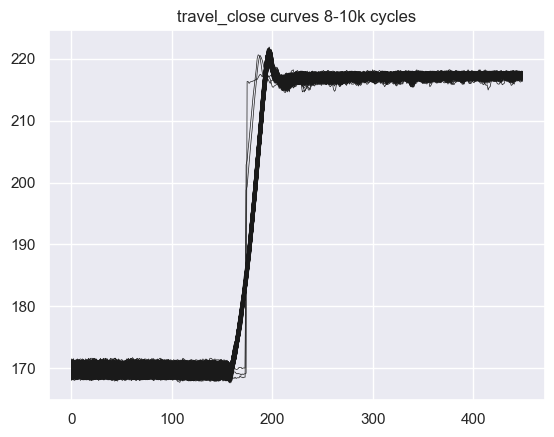

In [18]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'travel_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.7_Current open without reclosing 

number of current_open curves: 3736


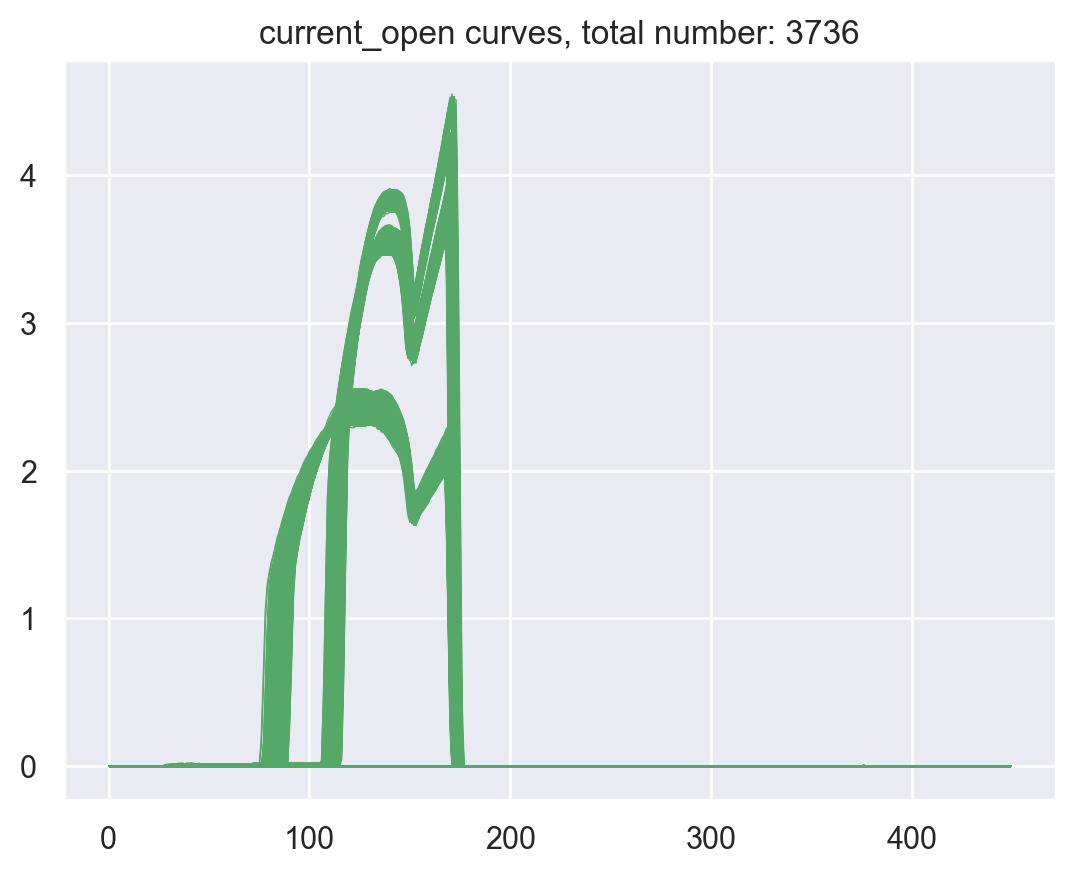

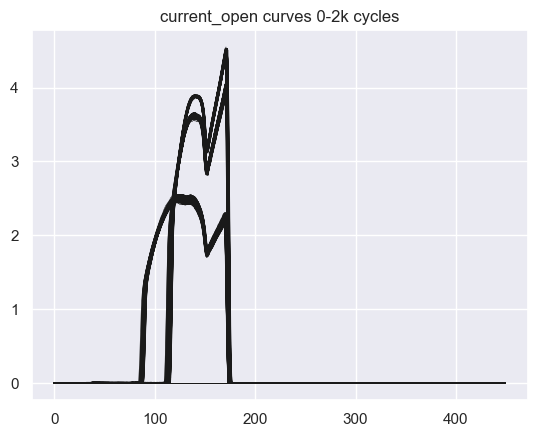

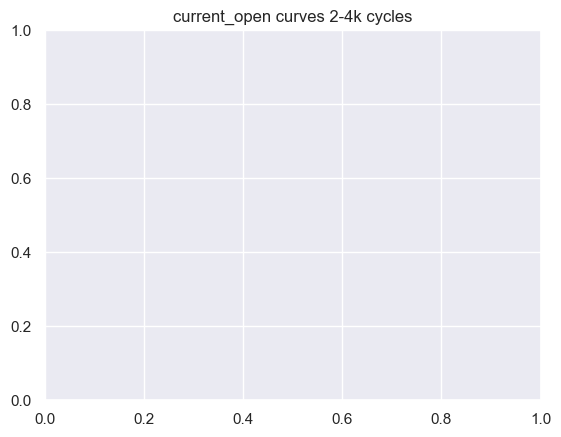

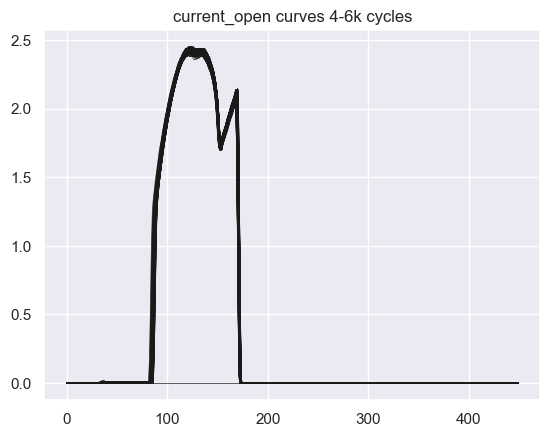

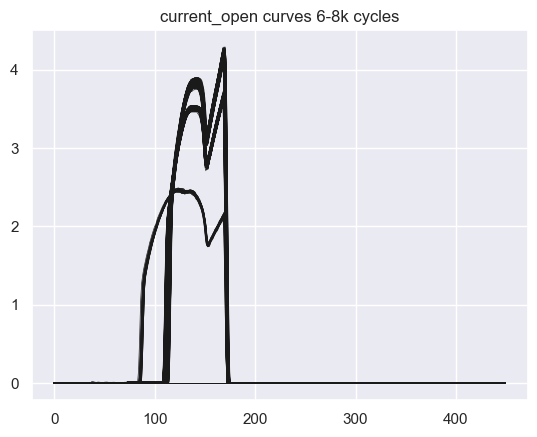

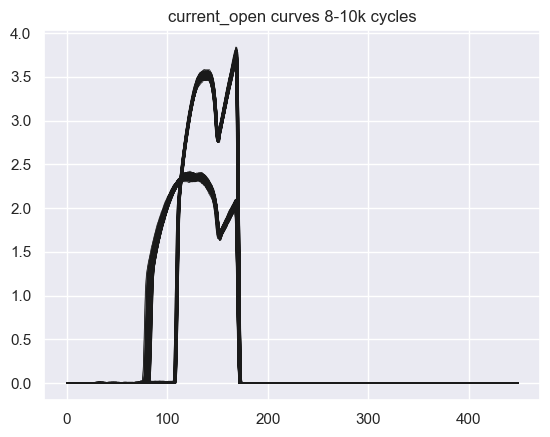

In [19]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'current_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.8_Current close without reclosing 

number of current_close curves: 3732


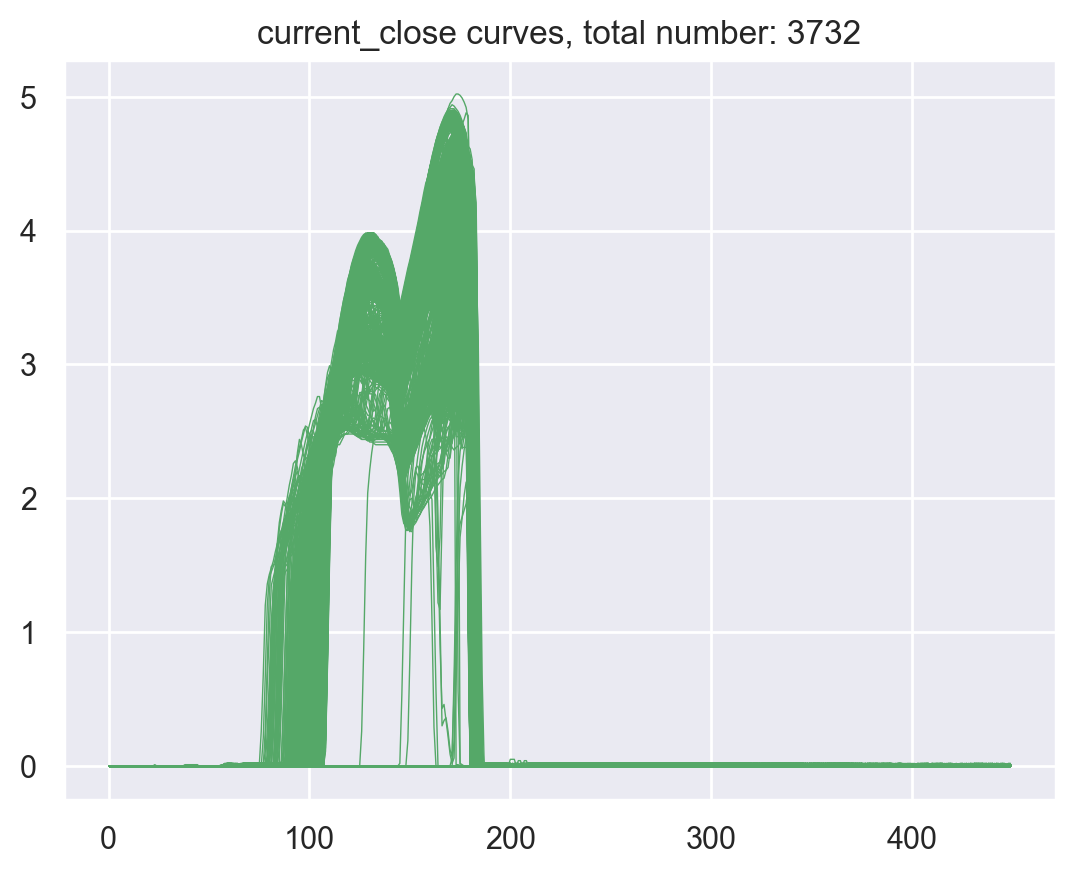

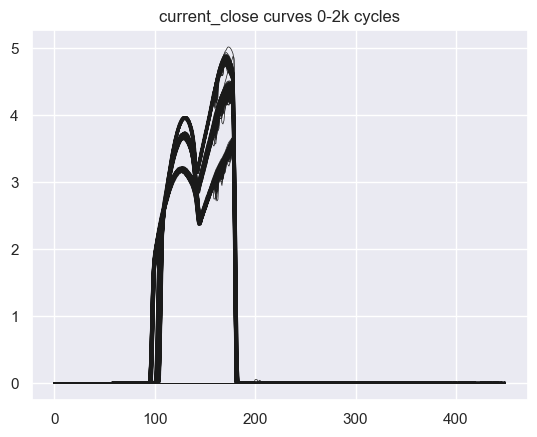

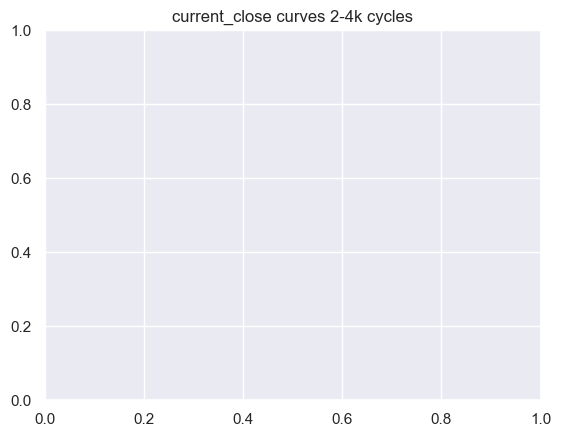

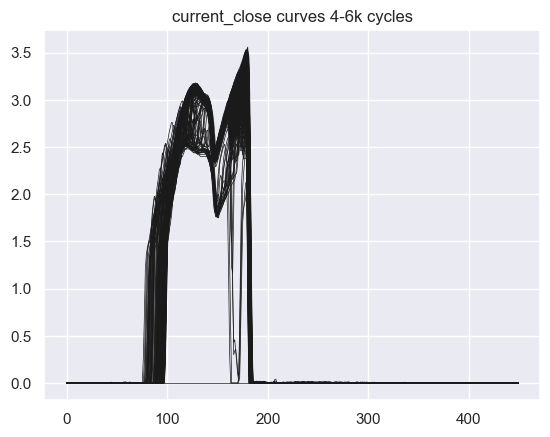

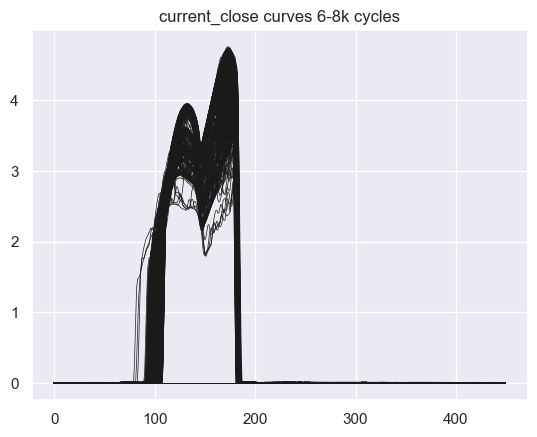

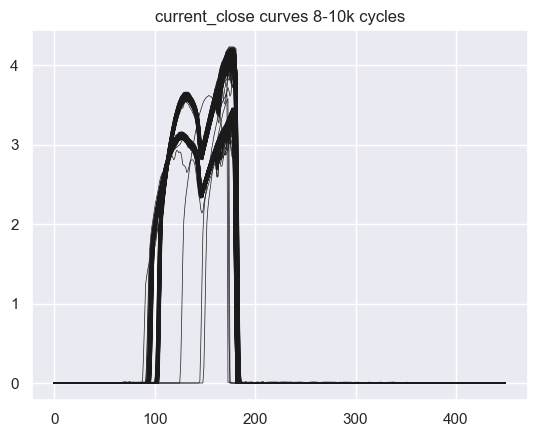

In [20]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'current_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

# 3_Parameter calculation
## 3.1_Travel

OSError: [Errno 22] Invalid argument

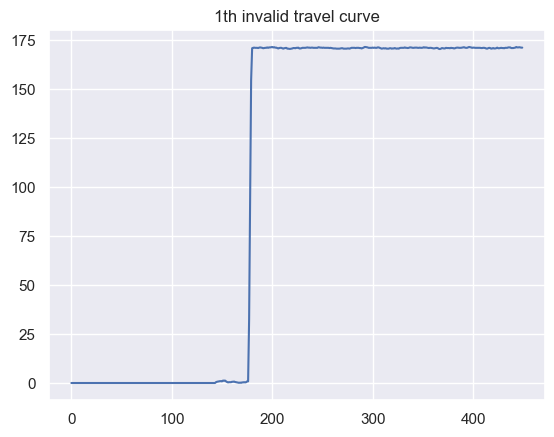

In [2]:
travel_list, travel_invalid_list= [], []
open_spd_list, close_spd_list= [], []
invalid_count = 0
for cur_dir, dirs, files in os.walk(dir_noreclosing_washed):
    for file in files:
        if ('travel_open' in file) | ('travel_close' in file):
            angle_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            # print(angle_df.columns)
            angle_arr = np.array(angle_df['data'])
            # print(angle_arr.shape)
            head = np.mean(angle_arr[:50])
            tail = np.mean(angle_arr[-50:])
            # print(head,tail)
            travel, angle_open, angle_close  = ME.MechOperMconfig.cal_travel(head=head, tail=tail)
            if (travel <= 60) & (travel >= 30): 
                travel_list.append(travel)
                if 'travel_open' in file:
                    op_type = 'O'
                    speed = ME.MechOperMconfig.cal_speed(angle_arr, op_type, travel, angle_close)
                    open_spd_list.append(speed)
                elif 'travel_close' in file:
                    op_type = 'C'
                    speed = ME.MechOperMconfig.cal_speed(angle_arr, op_type, travel, angle_close)
                    close_spd_list.append(speed)
                else:
                    op_type = 'U'

            else:
                invalid_count += 1
                plt.figure()
                plt.plot(angle_arr)
                plt.title('{}th invalid travel curve'.format(invalid_count))
travel_arr = np.array(travel_list)
open_spd_arr = np.array(open_spd_list)
close_spd_arr = np.array(close_spd_list)
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(travel_arr, 
                                  title='travel', 
                                  ylabel='travel in degree')


## 3.2_open/close time

In [ ]:

print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_spd_arr, 
                                  title='open speed', 
                                  ylabel='deg/ms')
ME.MechOperMconfig.para_dist_plot(close_spd_arr, 
                                  title='close speed', 
                                  ylabel='deg/ms')